## Domain – Automotive
## focus – Incentivize drivers

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/driver-data.csv")

In [3]:
df.head(10)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [4]:
df.shape

(4000, 3)

In [7]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [9]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
df["id"].nunique()

4000

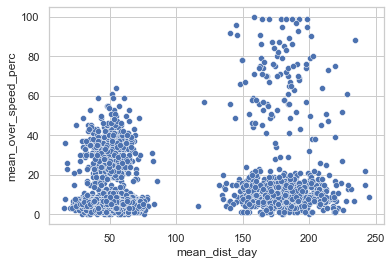

In [89]:
## Checking visualising data
##plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.scatterplot(x="mean_dist_day",
                    y="mean_over_speed_perc",
                    data=df)
plt.show()

In [26]:
cols = ["mean_dist_day","mean_over_speed_perc"]

### Standardizing the data

In [24]:
## Apply Standardization 
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
# Fit on training set only.
df_data = scaler.fit_transform(df[cols])

In [43]:
df_data = pd.DataFrame(df_data)

In [46]:
df_data.rename(columns={0:'mean_dist_day',1:'mean_over_speed_perc'},inplace=True)

In [47]:
df_data

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744
...,...,...
3995,1.571155,-0.052602
3996,1.872860,-0.417383
3997,1.774474,0.093311
3998,1.872299,-0.417383


### Applying KMeans clustring

In [48]:
from sklearn.cluster import KMeans

In [74]:
## Building basic model with assuming cluster value as 2
kmeans = KMeans(n_clusters=2, random_state=48)#Creating a K-Means Object
kmeans.fit(df_data)#Fitting the Model

KMeans(n_clusters=2, random_state=48)

In [75]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df_data)
labels[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [76]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[-0.48581565, -0.13816168],
       [ 1.94630276,  0.55351131]])

In [77]:
kmeans.inertia_

3911.9263904284117

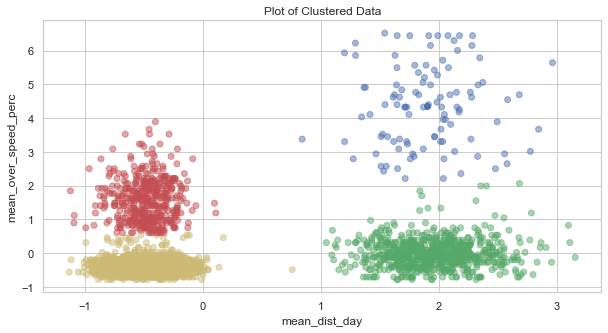

In [87]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df_data['mean_dist_day'], df_data['mean_over_speed_perc'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.title('Plot of Clustered Data')
plt.show()

## Using Elbow method to identify the number of clusters

In [79]:
## Running Model on multiple clusters to determine inertia of the model
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters, random_state=48)
    kmeans.fit(df_data)
    inertia_list.append(kmeans.inertia_)
print(inertia_list)

[7999.999999999998, 3911.9263904284117, 1756.5445821314256, 739.1534508645556, 619.4037594867993, 502.1189726386456, 438.5298937133247, 374.81039700021614, 340.43089912769216, 307.2560799650155, 275.34441211725385, 247.73524530362414, 228.7771275358062, 210.63859466490698, 198.0726583753511, 187.06921801818322, 177.13417466500462, 168.86847107147645, 159.68047125045845, 154.44382366712773]


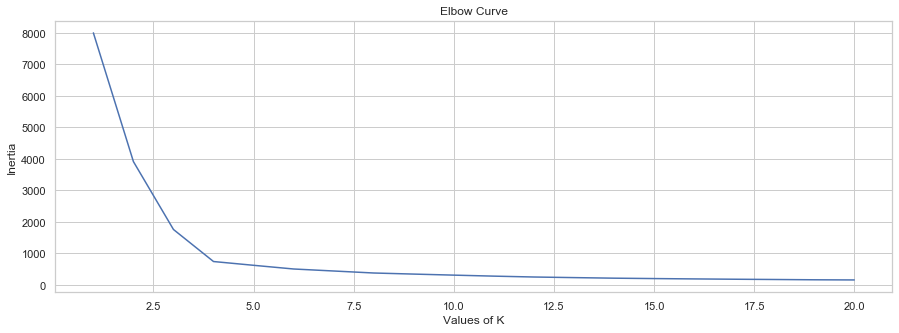

In [80]:
#Plotting the Elbow Curve
plt.figure(figsize=(15, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

### From Elbow plot we can determine that the closest value of K=4

## So builing K-Means clustering with K=4 which can be used for prediction

In [98]:
kmeans = KMeans(n_clusters=4, random_state=48)
kmeans.fit(df_data)

KMeans(n_clusters=4, random_state=48)

In [99]:
labels = kmeans.predict(df_data)
labels[:50]

array([3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3], dtype=int32)

In [100]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.90400473,  4.34582367],
       [-0.48678423, -0.40249736],
       [ 1.95263225, -0.0139714 ],
       [-0.47952334,  1.57909169]])

In [101]:
kmeans.inertia_

739.1534508645556

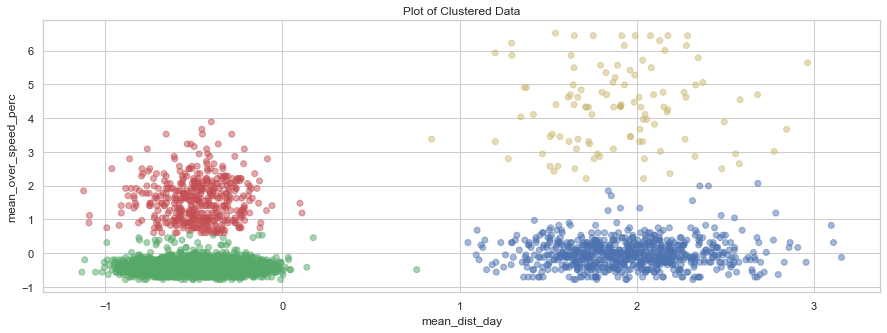

In [102]:
plt.figure(figsize=(15, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df_data['mean_dist_day'], df_data['mean_over_speed_perc'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.title('Plot of Clustered Data')
plt.show()